# 《合成孔径雷达成像——算法与实现》中7.2 CS算法中的变标及点目标平移

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题 

from numpy import pi,abs,max,min,argmax,argmin,ceil,exp,sqrt,real,imag,conj,sinc,sin,cos,tan,arctan,log10,angle,unwrap
from numpy import linspace,arange,zeros,ones,concatenate,convolve
from numpy.fft import fft,fftshift,ifft,ifftshift,fft2
from matplotlib.pyplot import figure,subplot,plot,axis,title,suptitle,xlabel,ylabel,text,arrow,tight_layout

In [2]:
## 参数设置 
N = 512;                                                    # 总的采样点数
Fr = 150;                                                   # 信号采样频率
Nr = 100;                                                   # 信号采样点数
Kr = 100;                                                   # 信号的调频率
## 参数计算
T = N/Fr;                                                   # 总的持续时间
Tr = Nr/Fr;                                                 # 信号持续时间
alpha = 0.05;                                               # 偏移参数
############################################################
# alpha = tau_a/tau_b - 1
############################################################
## 变量设置
t_0 = arange(-T/2,T/2,T/N);
t_1 = arange(-Tr/2,Tr/2,Tr/Nr);
f = arange(-Fr/2,Fr/2,Fr/N);
## 信号生成
#  原始信号
s_0_t = zeros(N,dtype='complex');
s_0_t[5:105] = exp(1j*pi*Kr*t_1**2);
s_0_t[205:305] = exp(1j*pi*Kr*t_1**2);
s_0_t[405:505] = exp(1j*pi*Kr*t_1**2);


d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Legend does not support '原' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Legend does not support '始' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Legend does not support '信' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
d:\anaconda3\envs\stock\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Legend does not support '号' instances.
A proxy artist may be used instead.
S

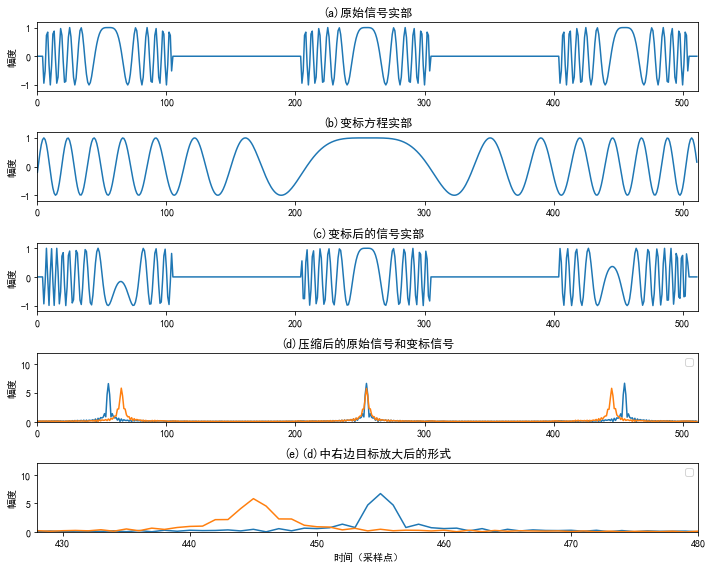

In [3]:
#  变标信号
s_p_t = exp(1j*pi*alpha*Kr*t_0**2);
## 信号处理
s_1_t = s_0_t * s_p_t;
## 匹配滤波
H_f = exp(1j*pi*f**2/Kr);
s_2_t = ifft(fftshift(fft(s_0_t))* H_f);
s_3_t = ifft(fftshift(fft(s_1_t))* H_f);
## 绘制图形
H3 = figure(figsize=(10,8));
# set(H3,'position',[100,100,600,900]); 
subplot(511), plot(real(s_0_t))
axis([0,512, -1.2,1.2])
ylabel('幅度'), title('(a)原始信号实部');
subplot(512), plot(real(s_p_t))
axis([0,512, -1.2,1.2])
ylabel('幅度'), title('(b)变标方程实部');
subplot(513), plot(real(s_1_t))
axis([0,512, -1.2,1.2])
ylabel('幅度'), title('(c)变标后的信号实部');
subplot(514), plot(abs(s_2_t)), plot(abs(s_3_t))
axis([0,512, 0,12])
plt.legend('原始信号', '变标后的信号'), ylabel('幅度'), title('(d)压缩后的原始信号和变标信号');
subplot(515), plot(abs(s_2_t)), plot(abs(s_3_t))
axis([428,480, 0,12])
plt.legend('原始信号', '变标后的信号'), xlabel('时间（采样点）'), ylabel('幅度'), title('(e)(d)中右边目标放大后的形式');

plt.tight_layout()

本文Python代码参照Matlab代码自：https://gitee.com/wanghs008/SAR-SignalProcessing/tree/main/chapter_seven

